# PCA on Yale Face Dataset

Importing The Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

# Eigenfaces
# Exploring & Visualizing the Image Data

In [2]:
K = 5   # Number of Subjects to be viewed

def horizontal_sub(dir):
    imgs = os.listdir(dir)
    idx = 4
    h_imgs = cv.imread(dir+imgs[3],0)
    while idx<67:
        im = cv.imread(dir+imgs[idx],0)
        h_imgs= np.hstack((im,h_imgs))
        idx+=7
    return h_imgs

def all_imgs(dirv,K):
    v_stack = horizontal_sub(directory)
    for i in range(2,K+1):
        if i != 14:
            dir = dirv+'{}'.format(str(i).zfill(2))+'/'
            h_stack = horizontal_sub(dir)
            v_stack = np.vstack((h_stack,v_stack))
        else:
            pass
    return v_stack

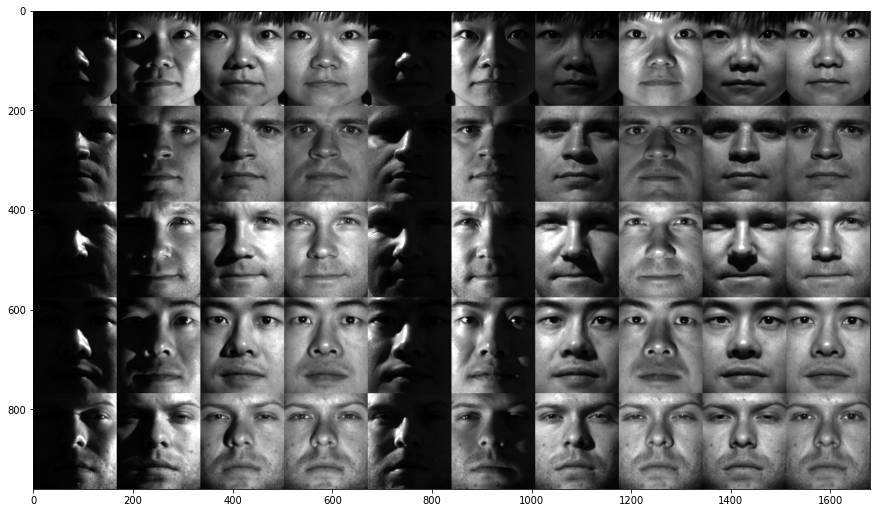

In [3]:
# Image Directories
directory = 'CroppedYale/yaleB01/'
dirv = 'CroppedYale/yaleB'

img_viewer = all_imgs(dirv,K)
plt.figure(figsize=(15,15))
plt.imshow(img_viewer, cmap = 'gray')
plt.show()


# Generating the Pattern Matrix

In [4]:

def Vectorize(images):
    w,h = images.shape
    images = images.reshape(w*h,1)
    return images

def Pattern_mat(Subjects):
    Pat = np.zeros((32256,1))
    for i in range(1,Subjects+1):
        try:
            sub_dir = dirv+str(i).zfill(2)+'/'
            img_dir = os.listdir(sub_dir)
        except:
            continue
        for j in range(4,66):
            p_img = cv.imread(sub_dir+'/'+img_dir[j],0)
            img_vector = Vectorize(p_img)
            Pat = np.concatenate((img_vector,Pat), axis=1)
    Pat = Pat[:,:-1]
    return(Pat)


In [5]:
P = Pattern_mat(10)

# Mean normalized Pattern matrix

In [6]:
mean = P.mean(1)
mean = mean.reshape((32256,1))
P = P - mean

# Mean Face

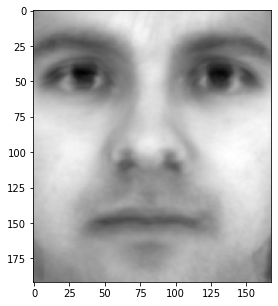

In [7]:
m_face = mean.reshape((192,168))
plt.figure(figsize=(5, 5))
plt.imshow(m_face, cmap='gray')
plt.show()

# SVD Implementation

In [8]:
U,Sig,V = np.linalg.svd(P, full_matrices= False)

print(U.shape)

(32256, 620)


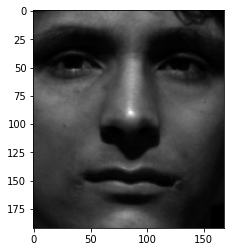

Above face is Test Face for reconstruction


In [9]:
face = cv.imread('CroppedYale/yaleB35/yaleB35_P00A+000E+45.pgm',0)
plt.imshow(face, cmap='gray')
plt.show()
print('Above face is Test Face for reconstruction')

# Vectorizing and Normalizing the test face
testface = Vectorize(face)
n_testface = testface - mean

# Reconstructung the TestFace using Eigen Basis

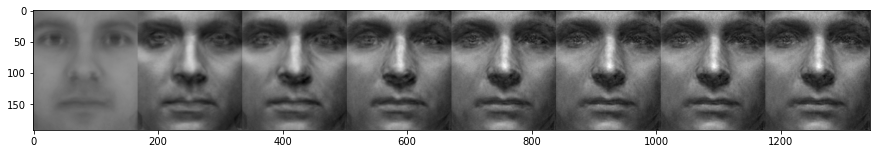

First face is Mean face while remaining are eigenface reconstructions.


In [14]:

Eigen_r = [50,100,200,400,800,1200,2400]
reconstruct = m_face
for r in Eigen_r:
    R_Face = np.matmul(U[:,:r],np.matmul(U[:,:r].T,n_testface)) + mean
    R_img = R_Face.reshape((192,168))
    reconstruct = np.hstack((reconstruct,R_img))
plt.figure(figsize=(15, 15))
plt.imshow(reconstruct, cmap='gray')
plt.show()

print('First face is Mean face while remaining are eigenface reconstructions.')